# Markov chains

Since parsing the metadata has been solved, it is now time to think what we can do with the data.

Often enough, the theory behind {term}`Large Language Models (LLM) <LLM>` is simplified by creating a continuation of an exsiting text, following the credo of *what would be the next likely word based on the given input*.
Although in principle this is not false, it does not capture why LLMs can often provide rather convining results.

The concept of the likelihood of the next word or chapter to follow is though an essential question in stochastic and has been investigated by Andrey Markov.
In 1906, he used the $20,000$ letters of *Eugene Onegin* by *Alexander Pushkin* to analyze the distribution and patterns of vowels and consonants, and developed a model which nowadays is called *Markov chain* which still finds applications in such algorithms as Google's PageRank algorithm.

Therefore we can come up with the first basic generative analysis of our dataset: What is the most likely key to be struck for a given key, which we can then just prolong indefinetly.

## Theory

For this chapter we will limit ourselves to discrete time markov chains.

Let $X_0, X_1, X_2, \dots$ be random variables.
These variables are called a *markov chain* iff

$$
\mathbb{P}(X_{n+1} = x ~ | ~ X_1 = x_1, X_2 = x_2 \dots X_n = x_n) = \mathbb{P}(X_{n+1} = x | X_n = x_n)
$$

which translates to that in a series of random variables the next random variable is only dependent on the prior random variable.
This is called a *first order* markov chain.

In [16]:
import ki_ueben.midi
from datetime import timedelta, datetime

In [3]:
piano_roll = ki_ueben.midi.PianoRoll(midi_file_path="../../MIDI-Unprocessed_06_R1_2008_01-04_ORIG_MID--AUDIO_06_R1_2008_wav--1.midi")

In [4]:
p = piano_roll.piano_roll()

In [29]:
foo = p.resample(timedelta(seconds=0.1)).max().fillna(0.0)

In [10]:
foo = p.resample("1S").max().fillna(0.0)

/tmp/ipykernel_65180/59733640.py:1: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  foo = p.resample("1S").max().fillna(0.0)


In [11]:
import matplotlib.pyplot as plt

note,-1,35,38,40,41,42,43,44,45,46,...,73,74,75,76,77,78,79,80,81,83
time,,,,,,,,,,,,,,,,,,,,,
0 days 00:00:01.049479166,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0 days 00:00:01.063802083,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0 days 00:00:01.298177083,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0 days 00:00:01.347656250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0 days 00:00:01.384114583,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0 days 00:03:41.877604166,0.0,48.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0 days 00:03:41.899739583,0.0,48.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0 days 00:03:43.802083333,0.0,48.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


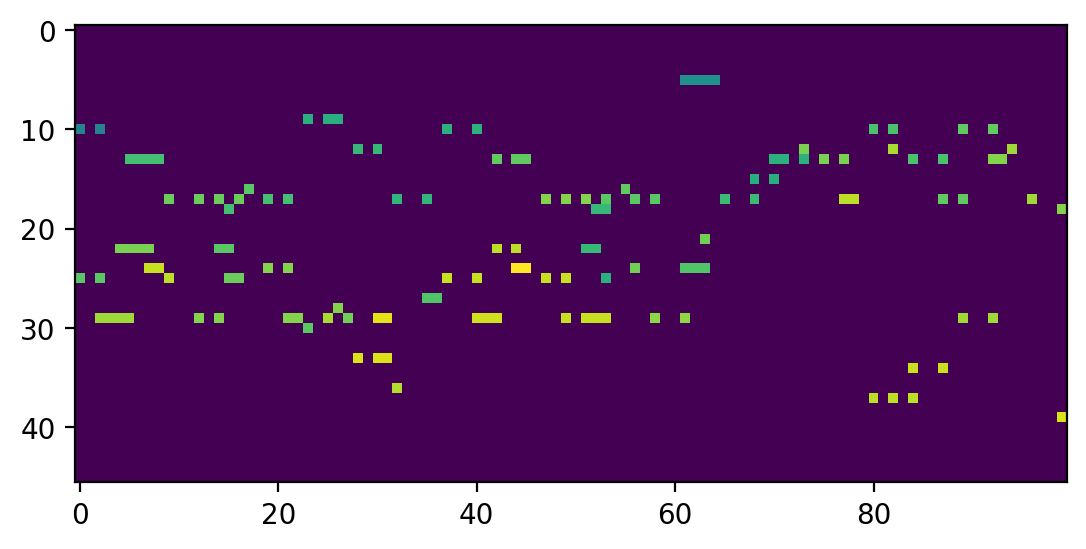

In [30]:
plt.imshow(foo.values[0:100, :].T)

In [3]:
import numpy as np

class MarkovPiano:
    def __init__(self, transition_matrix: np.ndarray, init_state: int) -> None:
        self.transition_matrix = transition_matrix
        self.state = init_state

    
    def next(self) -> int:
        self.state = np.random.choice(len(self.transition_matrix), p=self.transition_matrix[self.state])
        return self.state

The concept of carfeul crafting algorithms to analyze music has been a long part of music informatics, but with the advent of powerful neural networks.

Yet, this still allows for fruitful investigations, as the algorithms can be tweaked and influenced, aligned and trained much easier than a neural network, and do not consume such vast amounts of resources.

Some other approaches follow the use of generative grammar, which can be found in ...?

In [4]:
import mido
import pandas as pd

In [5]:
midi = mido.MidiFile("/home/dennis/Downloads/kolessova04.mid")

In [6]:
for msg in midi:
    print(msg)
    break

MetaMessage('track_name', name='Sonata No. 2    TatianaKolessova', time=0)


In [7]:
for msg in midi:
    if msg.type == 'set_tempo':
        print(msg.tempo)

512820


In [8]:
mido.tempo2bpm(512820)

117.000117000117

In [9]:
m = None

for msg in midi:
    if msg.type == "note_on":
        m = msg

In [10]:
m.time

0

In [49]:
events = []
time = 0.0
for msg in midi:
    time += msg.time
    if any([x == msg.type for x in ["note_on", "note_off"]]):
        events.append({
            "note": msg.note,
            "velocity": msg.velocity if msg.type=="note_on" else 0,
            "time": time,
        })
    elif msg.is_cc(64):
        events.append({
            "note": -1,
            "velocity": msg.value,
            "time": time,
        })
events = pd.DataFrame(events)
events['time'] = events['time'].cumsum()

In [50]:
x = events.pivot_table(values="velocity", index="time", columns="note", aggfunc="max").fillna(0.0)

note,21,22,23,24,25,26,27,28,29,30,...,94,95,96,97,98,99,100,101,103,105
time_note,,,,,,,,,,,,,,,,,,,,,
0.4935892499999999-65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.5747857499999999-63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.6185891249999999-65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.6303412499999999-61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.6816232499999999-58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99.81186599999963-73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99.84925912499962-80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99.89626762499962-75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
x = x.ffill().fillna(0.0)

In [34]:
import matplotlib.pyplot as plt

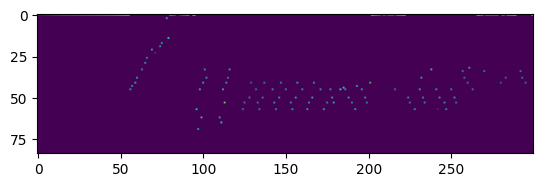

In [51]:
plt.imshow(x.values.T[:, 0:300])

In [ ]:
events = pd.DataFrame({
    'time': [1, 2, 1, 3, 3, 4],
    'note': ['A', 'A', 'B', 'C', 'B', 'A'],
    'velocity': [10, 20, 30, 40, 50, 60]
})

# Create a new index by combining 'time' and 'note'
events['time_note'] = events['time'].astype(str) + '-' + events['note']

# Pivot the table
pivot_table = events.pivot_table(values='velocity', index='time_note', columns='note', aggfunc='first')

# Drop the temporary 'time_note' column
pivot_table.drop(columns=['time_note'], inplace=True)

In [37]:
from pathlib import Path
import glob

base_path = Path("/home/dennis/Downloads/maestro/maestro-v3.0.0")

x=[base_path.joinpath(x) for x in glob.glob("**/*.midi", root_dir=base_path)]

In [40]:
x[0]

PosixPath('/home/dennis/Downloads/maestro/maestro-v3.0.0/2018/MIDI-Unprocessed_Recital17-19_MID--AUDIO_19_R1_2018_wav--4.midi')